In [1]:
# Import libraries and modules
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from scikeras.wrappers import KerasClassifier

In [2]:
# Load MNIST data
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [4]:
# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


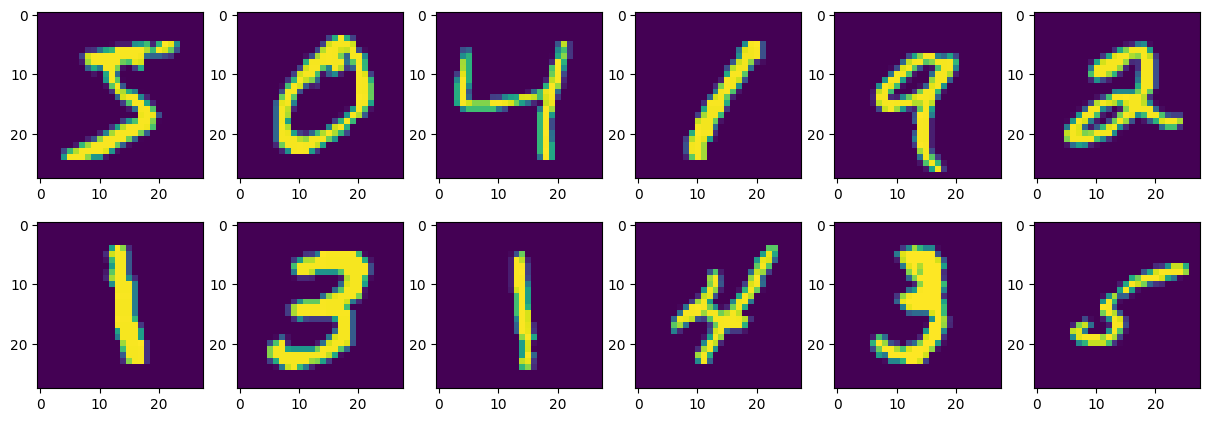

In [5]:
# sample mnist digits from train dataset
from matplotlib.colors import Colormap
fig, axes = plt.subplots(nrows=2, ncols=6,figsize=(15,5))
ax = axes.ravel()
for i in range(12):
  ax[i].imshow(X_train[i].reshape(28,28))
plt.show()

In [6]:
# Data preprocessing (scaling pixel values from 0 to 255 to range from 0.0 to 1.0)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
# One-hot encoding (to convert labels from digit format (0-9) to one-hot vector)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

##### Model Building and Hyperparameter tuning

##### Sequential convolutional neural network architecture employing alternating convolutional and max pooling layers

In [20]:
def create_model(optimizer = 'sgd', dropout = 0.5, neurons = 128):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(24, kernel_size=5, padding='same', activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(48, kernel_size=5, padding='same', activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(neurons, activation = 'relu'),
    tf.keras.layers.Dropout(rate = dropout),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [21]:
model = KerasClassifier(model=create_model, verbose=0)
print(model.get_params().keys())

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'class_weight'])


##### Tuning hyperparameters through gridsearch
##### Please note that I have kept the list limited for each hyperparameter since the execution is taking a lot of time

In [22]:
optimizers = ['sgd', 'adam']
epochs = [8, 10]
batch_size = [32, 64]
param_grid = dict(optimizer=optimizers, model__dropout=dropout, model__neurons=neurons, epochs=epochs, batch_size=batch_size)

In [13]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

In [ ]:
# summarize results; best values for the hyperparameters obtained through above gridsearch
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [8]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 3
model = [0] *nets

for j in range(3):
    model[j] = tf.keras.models.Sequential()
    model[j].add(tf.keras.layers.Input(shape=(28, 28, 1)))
    model[j].add(tf.keras.layers.Conv2D(24, kernel_size=5, padding='same', activation = 'relu'))
    model[j].add(tf.keras.layers.MaxPool2D())
    if j>0:
        model[j].add(tf.keras.layers.Conv2D(48, kernel_size=5, padding='same', activation = 'relu'))
        model[j].add(tf.keras.layers.MaxPool2D())
    if j>1:
        model[j].add(tf.keras.layers.Conv2D(64, kernel_size=5, padding='same', activation = 'relu'))
        model[j].add(tf.keras.layers.MaxPool2D(padding='same'))
    model[j].add(tf.keras.layers.Flatten())
    model[j].add(tf.keras.layers.Dense(256, activation='relu'))
    model[j].add(tf.keras.layers.Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [9]:
history = [0] * nets
names = ["1_convolutional_layer","2_convolutional_layer","3_convolutional_layer"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(X_train, y_train, batch_size = 80, epochs = epochs, validation_split = 0.2)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j], epochs,max(history[j].history['acc']), max(history[j].history['val_acc']) ))

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8845 - loss: 0.3849 - val_accuracy: 0.9738 - val_loss: 0.0858
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9815 - loss: 0.0652 - val_accuracy: 0.9815 - val_loss: 0.0594
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9876 - loss: 0.0385 - val_accuracy: 0.9839 - val_loss: 0.0513
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9928 - loss: 0.0236 - val_accuracy: 0.9846 - val_loss: 0.0521
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9950 - loss: 0.0167 - val_accuracy: 0.9833 - val_loss: 0.0562
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9964 - loss: 0.0117 - val_accuracy: 0.9858 - val_loss: 0.0496
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9968 - loss: 0.0093 - val_accuracy: 0.9833 - val_loss: 0.0595
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9972 - loss: 0.0080 - val_accu

KeyError: 'acc'